In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
activations_df = pd.read_csv("../results/nn/nn_activations_walker.csv")
activations_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,point_id,seed,task
0,5.458768,9.671891,-4.179758,-3.633679,-0.760518,10.778007,-3.779326,3.394686,1.459111,7.780652,...,2.741881,-7.106968,-0.675734,-7.745096,1.920060,4.618226,1.718434,0,0,walker
1,0.864051,4.241373,-1.605679,0.931577,2.169634,8.847008,-3.357722,2.603040,2.190890,3.955059,...,7.980305,-8.322464,0.686931,-2.756277,2.242640,8.402941,5.429038,1,0,walker
2,1.227647,3.338596,-2.453675,-1.212255,2.320682,2.409498,-2.828130,-1.157749,0.663142,1.256038,...,0.587983,-0.028964,-2.711264,-3.079494,1.367748,3.764571,0.878954,2,0,walker
3,1.298085,5.655344,-3.844241,-1.205161,6.402591,5.481221,0.670638,-5.346409,2.396182,-5.177288,...,3.897157,-3.895742,-2.692709,-4.987708,8.847800,2.468780,1.905922,3,0,walker
4,4.956495,15.998729,-17.109333,-7.339735,12.025031,16.848314,-4.694012,7.982615,9.898874,16.653603,...,-1.316263,-7.042782,-3.490477,-22.708914,0.158145,13.043076,7.730457,4,0,walker


In [3]:
x = activations_df.iloc[:, :-3].to_numpy()
x

array([[  5.4587684 ,   9.671891  ,  -4.1797576 , ...,   1.9200602 ,
          4.618226  ,   1.7184337 ],
       [  0.86405134,   4.241373  ,  -1.6056793 , ...,   2.2426405 ,
          8.402941  ,   5.4290376 ],
       [  1.2276467 ,   3.3385959 ,  -2.4536753 , ...,   1.3677483 ,
          3.7645714 ,   0.87895375],
       ...,
       [ -4.4192014 ,  -2.2413406 ,  -4.092028  , ...,  -1.3520186 ,
         -4.3212037 ,  -1.7285091 ],
       [ -5.566416  ,  -5.412485  ,   4.840322  , ...,  -3.281627  ,
         -4.350221  ,   5.858339  ],
       [ -8.179878  ,  -0.7676903 ,   6.275554  , ...,  -8.094785  ,
         -0.56890273, -10.91948   ]])

In [4]:
# Scale the data
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(x)
joblib.dump(scaler, "../experiments/data/nn_obs_scaler.pkl")

['../experiments/data/nn_obs_scaler.pkl']

In [5]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_matrix)
joblib.dump(pca, "../experiments/data/nn_obs_pca.pkl")
pca_result

array([[ 0.14276717, -0.52713085, -1.72643511, ..., -0.45288567,
        -0.33933804,  0.06373809],
       [ 0.09031986, -0.70944586, -1.27930037, ..., -0.18117522,
        -0.02687504, -0.26048236],
       [-0.27032625, -0.20927642, -0.93806986, ...,  0.05000895,
         0.04676216, -0.09290511],
       ...,
       [-0.79259866, -1.90062628, -0.11434601, ..., -0.12533642,
        -0.02737343, -0.03307598],
       [-1.29500046, -6.05139436, -1.13178823, ..., -0.42658085,
        -0.29427074,  0.10361316],
       [-1.39222982, -3.1399604 ,  0.3224681 , ...,  0.15213168,
        -0.08229398, -0.27153046]])

In [6]:
pca.explained_variance_ratio_

array([0.13092045, 0.10604153, 0.09430504, 0.08047441, 0.06665437,
       0.05413037, 0.05018837, 0.04018559, 0.03803877, 0.03139058,
       0.02624841, 0.0208625 , 0.02040101, 0.01852272, 0.01695239,
       0.01581556, 0.01509427, 0.01452282, 0.01400078, 0.0132236 ,
       0.01147521, 0.01105562, 0.01021914, 0.00970404, 0.00865594,
       0.00858904, 0.00763321, 0.0070249 , 0.00665848, 0.00648551,
       0.00587027, 0.00570795, 0.00521775, 0.00495919, 0.00453072,
       0.0042447 , 0.00404186, 0.00358252, 0.0032474 , 0.00312297])

In [7]:
activations_df["PCA1"] = pca_result[:, 0]
activations_df["PCA2"] = pca_result[:, 1]
activations_df["seed_string"] = activations_df["seed"].apply(lambda s: f"s{s}")
activations_df.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,point_id,seed,task,PCA1,PCA2,seed_string
0,5.458768,9.671891,-4.179758,-3.633679,-0.760518,10.778007,-3.779326,3.394686,1.459111,7.780652,...,-7.745096,1.920060,4.618226,1.718434,0,0,walker,0.142767,-0.527131,s0
1,0.864051,4.241373,-1.605679,0.931577,2.169634,8.847008,-3.357722,2.603040,2.190890,3.955059,...,-2.756277,2.242640,8.402941,5.429038,1,0,walker,0.090320,-0.709446,s0
2,1.227647,3.338596,-2.453675,-1.212255,2.320682,2.409498,-2.828130,-1.157749,0.663142,1.256038,...,-3.079494,1.367748,3.764571,0.878954,2,0,walker,-0.270326,-0.209276,s0
3,1.298085,5.655344,-3.844241,-1.205161,6.402591,5.481221,0.670638,-5.346409,2.396182,-5.177288,...,-4.987708,8.847800,2.468780,1.905922,3,0,walker,0.329022,-0.590250,s0
4,4.956495,15.998729,-17.109333,-7.339735,12.025031,16.848314,-4.694012,7.982615,9.898874,16.653603,...,-22.708914,0.158145,13.043076,7.730457,4,0,walker,1.286928,-0.361670,s0


In [8]:
averages = []
scaled_averages = []
max_range = 2.
for seed in range(10):
    tmp_x = activations_df[activations_df["seed"] == seed][["PCA1", "PCA2"]].to_numpy()
    averages.append(np.mean(tmp_x, axis=0))
    scaled_averages.append(0.5 + np.clip(np.mean(tmp_x, axis=0), -max_range, max_range) / (2 * max_range))
avg_df = pd.DataFrame(averages, columns=["x", "y"])
avg_scaled_df = pd.DataFrame(scaled_averages, columns=["x", "y"])
avg_df["seed_string"] = [f"s{i}" for i in range(10)]
avg_scaled_df["seed_string"] = [f"s{i}" for i in range(10)]
avg_df.head()

,x,y,seed_string
0,0.614007,-0.765213,s0
1,-1.262726,1.104867,s1
2,1.238676,-2.490922,s2
3,-2.441759,0.828849,s3
4,1.133521,0.057171,s4


/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


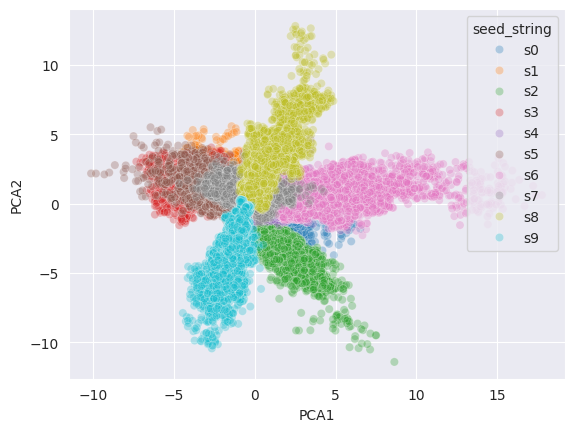

In [9]:
sns.scatterplot(
    data=activations_df,
    x="PCA1",
    y="PCA2",
    hue="seed_string",
    alpha=0.3
)
plt.show()

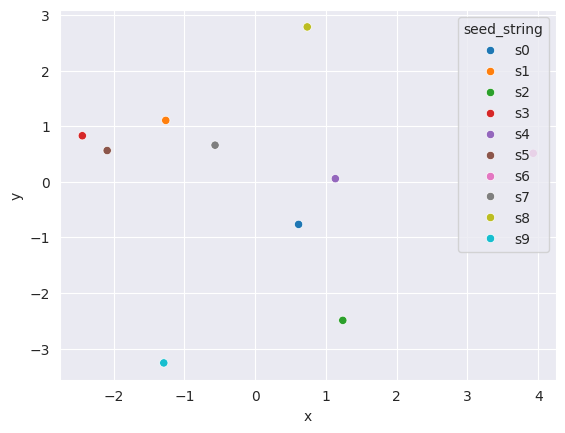

In [10]:
sns.scatterplot(
    data=avg_df,
    x="x",
    y="y",
    hue="seed_string",
)
plt.show()

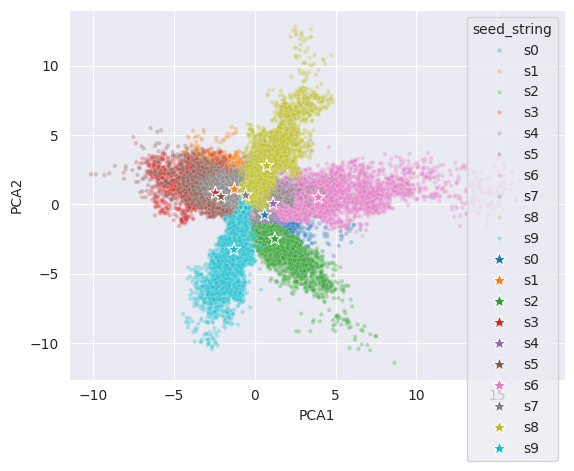

In [12]:
sns.scatterplot(
    data=activations_df,
    x="PCA1",
    y="PCA2",
    hue="seed_string",
    alpha=0.3,
    s=10
)
sns.scatterplot(
    data=avg_df,
    x="x",
    y="y",
    hue="seed_string",
    s=100,
    marker="*"
)
plt.show()